## Stock Sentiment Analysis
Sentiment analysis is basically concerned with analysis of emotions and opinions from text.

![SENTIMENT ANALYSIS](https://stackabuse.s3.amazonaws.com/media/sentiment-analysis-in-python-with-textblob-1.jpg)

🧰Importing Necessary Libraries

In [22]:
import pandas as pd
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import warnings
import matplotlib.pyplot as plt

# Import Visualization Libraries
import plotly.offline as pyo 
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import seaborn as sns 
from IPython.display import IFrame
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import random 

from collections import Counter
import nltk
nltk.download('wordnet')
import pandas as pd
from datetime import datetime 
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt
import textwrap
import plotly.express as px
import pandas as pd
from plotly import graph_objs as go

import numpy as np
import pandas as pd
import json, nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from mlxtend.plotting import plot_confusion_matrix

from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import re
import string
import warnings
from plotly import graph_objs as go

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91829\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


We read and glimpse the data.

In [23]:
DF = df = pd.read_csv('reddit_stock_sentiment.csv')

We will also look into data quality, for example missing data.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Author         200 non-null    object 
 1   Created At     200 non-null    float64
 2   Score          200 non-null    int64  
 3   Comment Count  200 non-null    int64  
 4   Title          200 non-null    object 
 5   Selftext       61 non-null     object 
 6   URL            200 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 11.1+ KB


## 🏗️Data Preprocessing

In [25]:
df.head()

Author    Created At  Score  Comment Count  \
0     RandomInvestor98  1.727330e+09  31906           1644   
1  Sad_Nefariousness10  1.722527e+09  29016          11819   
2  Efficient_Deer_8605  1.723558e+09  12336           1351   
3               sco-go  1.722704e+09  14514           1089   
4   Suspicious-Bad4703  1.722820e+09  11757           1014   

                                               Title  \
0  Nancy Pelosi’s husband sold more than $500K wo...   
1         I bought $700k worth of Intel stock today    
2                I bought $700k worth of Intel stock   
3  To the guy who spent his 700k inheritance on I...   
4                       Japanese Stocks are Crashing   

                                            Selftext  \
0                                                NaN   
1  https://preview.redd.it/83gh52szi2gd1.png?widt...   
2  I like the stock and I think it’s really cheap...   
3                                                NaN   
4                                                NaN   

                                                 URL  
0  https://nypost.com/2024/09/24/business/nancy-p...  
1  https://www.reddit.com/r/wallstreetbets/commen...  
2               https://i.redd.it/0e790lxetfid1.jpeg  
3                https://i.redd.it/d0cwjxtcchgd1.png  
4               https://i.redd.it/zde570etxqgd1.jpeg

The whole body of the text was devided into two coloumns, "Selftext" column and "Text", 
so we will concatenate the two of them

In [26]:
# Concatenate two columns into a new column
df['Text'] = df['Title'].fillna('') + ' ' + df['Selftext'].fillna('')

# Drop the original 'Title' and 'Selftext' columns
df = df.drop(['Title', 'Selftext'], axis=1)

#print(df.head())


### Descriptive Statistics about the Data
`.describe()` generates descriptive statistics. include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.

In [27]:
df.describe()

Created At          Score  Comment Count
count  2.000000e+02     200.000000     200.000000
mean   1.683435e+09   18389.195000    1436.540000
std    3.853661e+07   23221.256957    2347.415178
min    1.611955e+09    1311.000000     183.000000
25%    1.654897e+09    3327.500000     568.500000
50%    1.700292e+09    7407.000000     980.500000
75%    1.715863e+09   26371.750000    1686.000000
max    1.727708e+09  117119.000000   29680.000000

> We have only 200 records.

# 📈EDA and Data Visualization


We will use wordclouds to identify the most frequent words in the titles and body of the posts.

In [28]:
# !pip install wordcloud

In [29]:
def show_wordcloud(df, title=""):
    text = " ".join(t for t in df.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["stock", "bearish", "bullish", "profit", "loss", "buy", "sell",""])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()


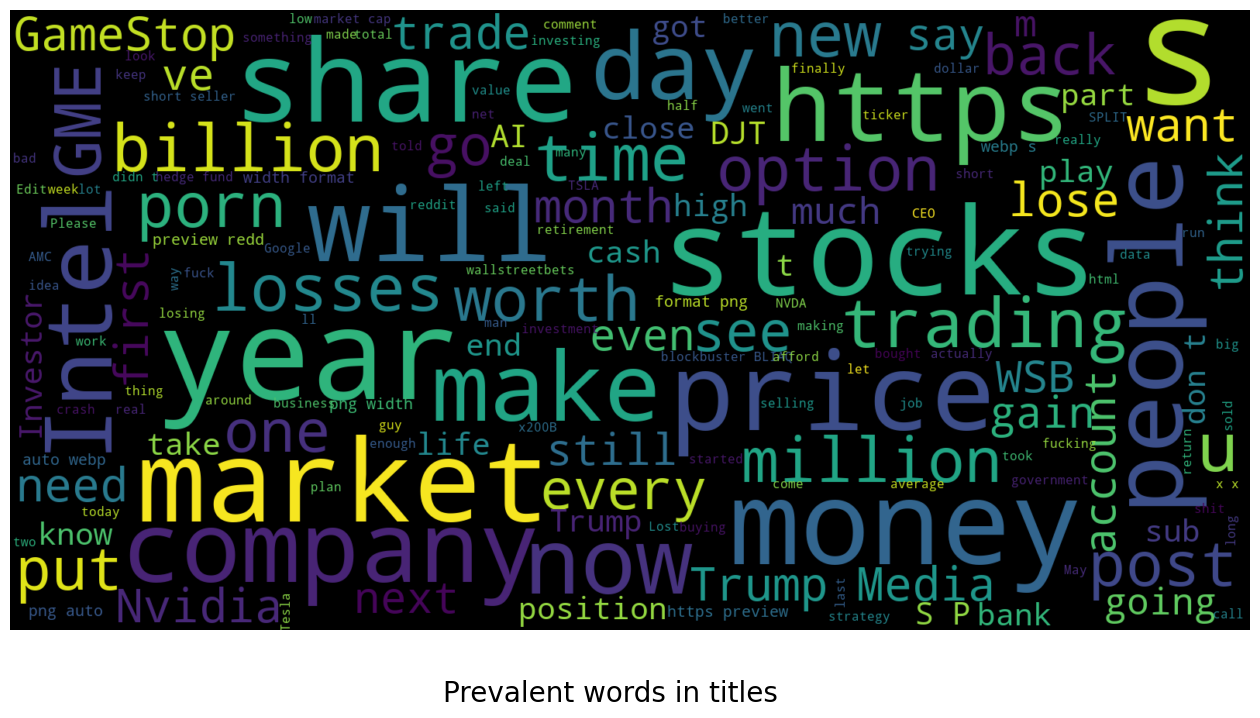

In [30]:
show_wordcloud(df['Text'], title = 'Prevalent words in titles')

## Sentiment Analysis
### NLTK Sentiment Intensity Analyzer

In [31]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91829\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Sentiment Intensity Analyzer:
This analyzer is pre-trained to evaluate the sentiment of a given text using a lexicon and rule-based approach. It can handle social media texts effectively.

In [32]:
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral"  

Displaying the count and percentage distribution of sentiment values

In [33]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='yellow')
    percent.plot(kind='bar', ax=ax2, color='orange')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

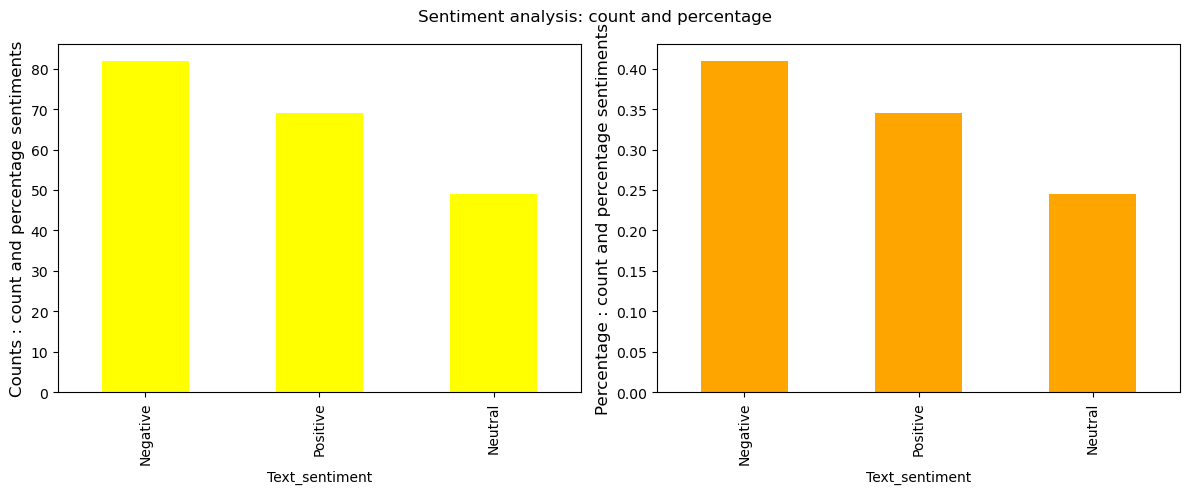

In [34]:
df['Text_sentiment'] = df['Text'].apply(lambda x: find_sentiment(x))        #adding new column to df
plot_sentiment(df, 'Text_sentiment', 'count and percentage')

> 1.  A higher proportion of Negative sentiment often correlates with bearish behavior<br>
> 2.  Positive sentiment, though lower, may indicate that a smaller but notable group of people are optimistic or bullish about specific stocks.<br>
> 3.  Neutral sentiment indicate that the market is not showing clear directional signals based on this dataset.

### Most prevalent words in each of the POSITIVE, NEGATIVE and NEUTRAL sentiments of Text 

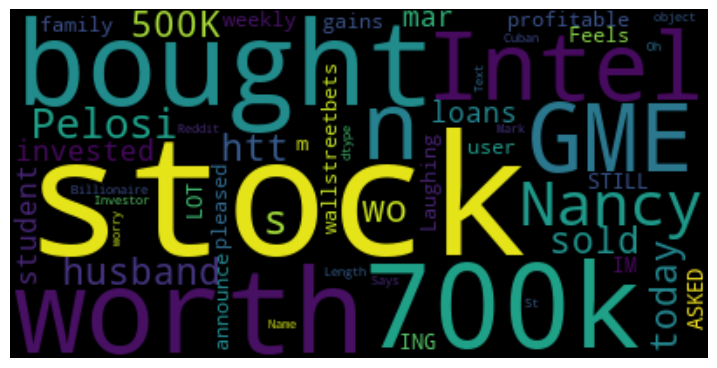

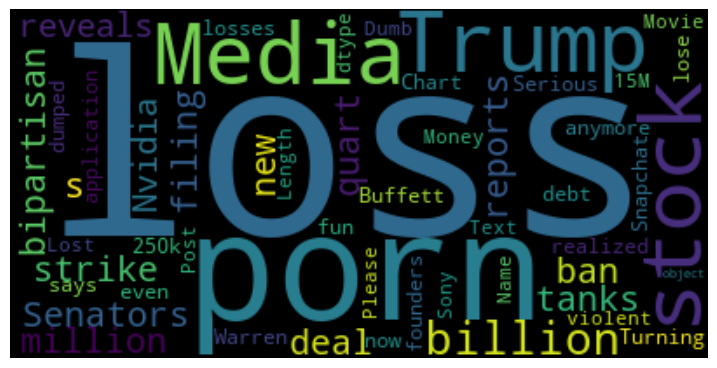

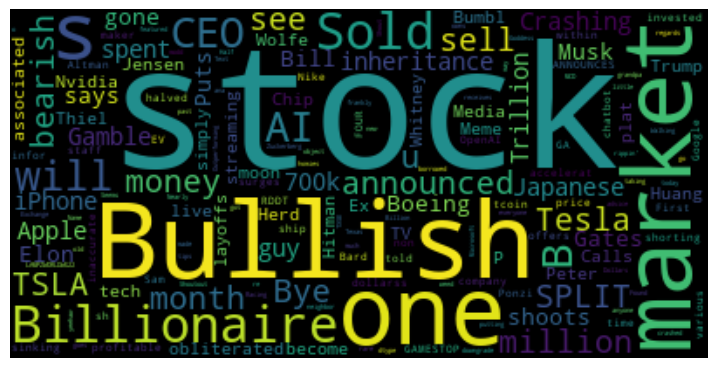

In [35]:
# from PIL import Image
# import numpy as np
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def show_wordcloud(data, title=None):
    wordcloud = WordCloud(background_color='black', max_words=200).generate(str(data))
    plt.figure(figsize=(9, 6))  # Smaller plot size
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    #plt.title( 'Prevalent words in titles (Positive sentiment)', size=15)
    
    plt.show()


show_wordcloud(df.loc[df['Text_sentiment']=='Positive', 'Text'], title = 'Prevalent words in body (Positive sentiment)')
show_wordcloud(df.loc[df['Text_sentiment']=='Negative', 'Text'], title = 'Prevalent words in body (Negative sentiment)')
show_wordcloud(df.loc[df['Text_sentiment']=='Neutral', 'Text'], title = 'Prevalent words in body (Neutal sentiment)')



In [36]:
df['Text_sentiment'].value_counts()

Text_sentiment
Negative    82
Positive    69
Neutral     49
Name: count, dtype: int64

> There is heighest of negative sentiments followed by positive and then neutral sentiments

Checking the average number of comments on the posts in the dataset

In [37]:
df['Comment Count'].sum()/df.shape[0]

1436.54

The distribution of the number of comments on posts.

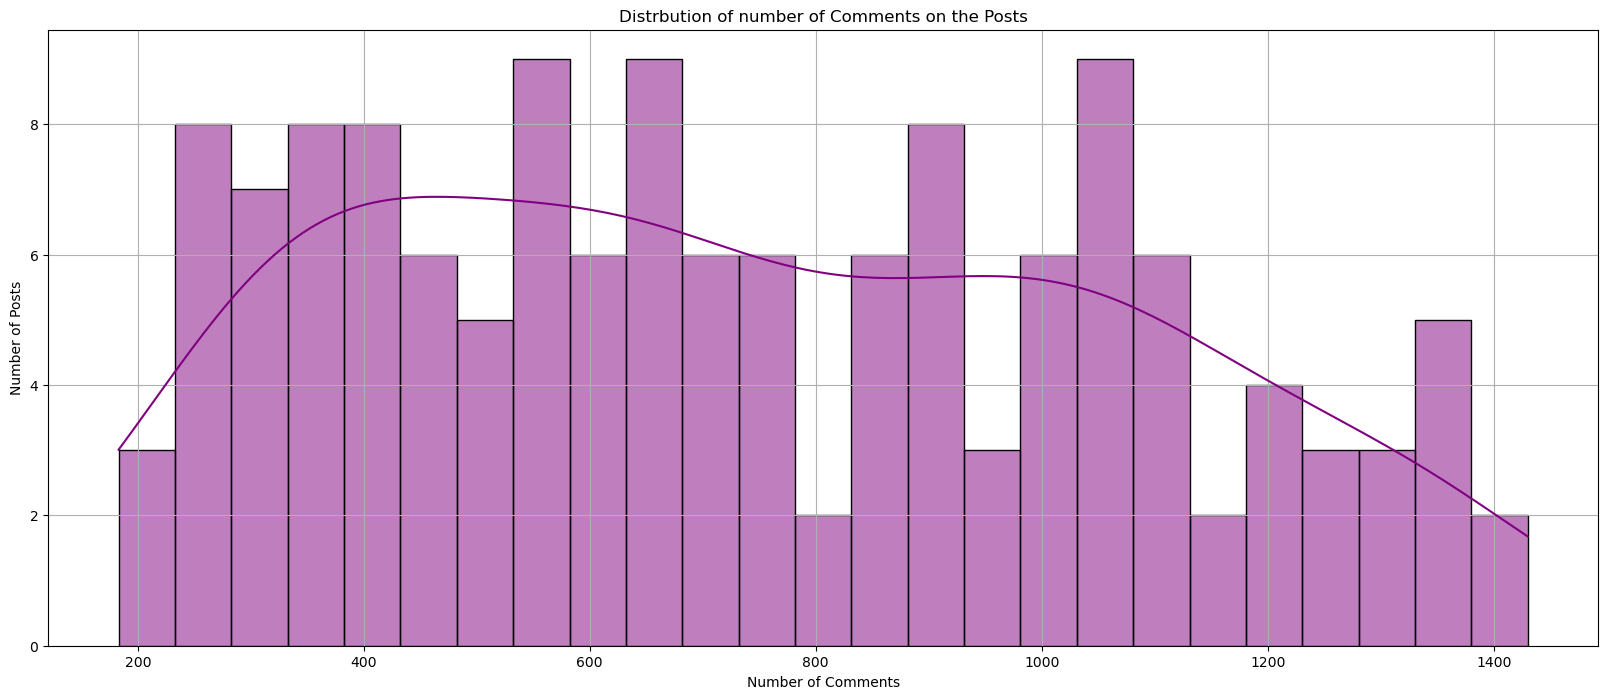

In [38]:
import seaborn as sns
plt.figure(figsize=(20,8))
sns.histplot(df[df['Comment Count'] < 1437]['Comment Count'], kde=True ,  binwidth=50 , color="purple")
#Add a kernel density estimate to smooth the histogram, providing complementary information about the shape of the distribution:

plt.grid()
plt.title("Distrbution of number of Comments on the Posts")
plt.ylabel("Number of Posts")
plt.xlabel("Number of Comments")

plt.show()

> 1. Most posts receive between 400-1000 comments, indicating high interaction.<br>
> 2. A right-skewed distribution suggests some posts gather more than 1200 comments.<br>
> 3. The distribution has multiple engagement clusters (multi-modal).

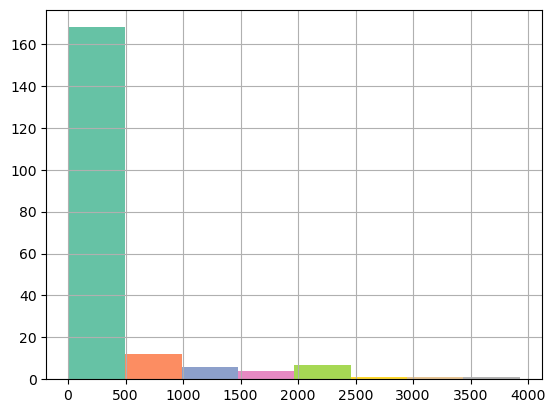

In [39]:
ax = plt.hist(df['Text'].str.len(), bins=8) 
colors = sns.color_palette("Set2", len(ax[2]))
for patch, color in zip(plt.gca().patches, colors):
    patch.set_facecolor(color)
plt.grid(True)
plt.show()

> 1. Most of the text entries have lengths under 500 characters<br>

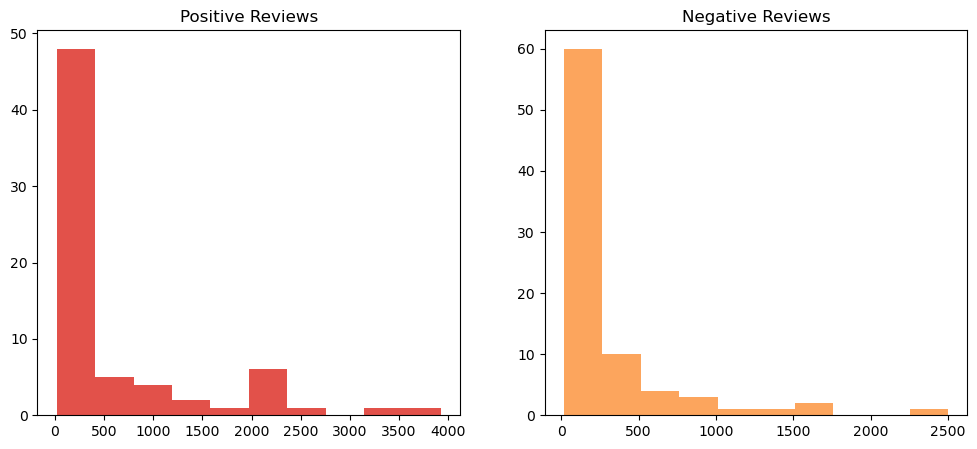

In [40]:
colors = sns.color_palette("Spectral", as_cmap=False)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
ax1.hist(df[df['Text_sentiment']=='Positive']['Text'].str.len(), color=colors[0])
ax1.set_title( 'Positive Reviews')
ax2.hist(df[df['Text_sentiment']=='Negative']['Text'].str.len(), color=colors[1])
ax2.set_title( 'Negative Reviews')
plt.show()

### 🧹 Data Cleaning

I scrubbed my data to remove errors and inconsistencies, ensuring my sentiment analysis model learns from reliable information.

In [41]:
# import re
# import string
# import warnings

# Suppress specific warning types
warnings.filterwarnings("ignore", category=SyntaxWarning)

def cleaning(Text):        
    # converting to lowercase, removing URL links, special characters, punctuations...
    Text = Text.lower() # converting to lowercase
    Text = re.sub('https?://\S+|www\.\S+', '', Text) # removing URL links
    Text = re.sub(r"\b\d+\b", "", Text) # removing number 
    Text = re.sub('<.*?>+', '', Text) # removing special characters, 
    Text = re.sub('[%s]' % re.escape(string.punctuation), '', Text) # punctuations
    Text = re.sub('\n', '',Text)
    Text = re.sub('[’“”…]', '', Text)

    
    # Removing multiple spaces
    Text = re.sub(r'\s+', ' ', Text).strip()  # remove multiple spaces and leading/trailing spaces
     
    return Text

In [42]:
ddf = df['Text'].apply(cleaning)

In [43]:
ddf = pd.DataFrame(ddf)  
ddf['Text_sentiment']=df['Text_sentiment']
ddf

Text Text_sentiment
0    nancy pelosis husband sold more than 500k wort...       Positive
1    i bought 700k worth of intel stock today tldr ...       Positive
2    i bought 700k worth of intel stock i like the ...       Positive
3    to the guy who spent his 700k inheritance on i...        Neutral
4                         japanese stocks are crashing        Neutral
..                                                 ...            ...
195  snapchat founders lose billions after violent ...       Negative
196         txse texas stock exchange announced yeehaw        Neutral
197  billionaire investor mark cuban says reddit st...       Positive
198  dumb money movie lost 15m sony please post you...       Negative
199  gme and stocks why to not worry oh my god gme ...       Positive

[200 rows x 2 columns]

#### Understanding the data:

In [44]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91829\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
ddf['cleaned_text'] = ddf['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

Working with the most Frequent Words:

In [46]:
# from collections import Counter
cnt = Counter()
for text in ddf["cleaned_text"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp.style.background_gradient(cmap='Purples')


removing the most frequent words

In [47]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
ddf["cc_text"] = ddf["cleaned_text"].apply(lambda text: remove_freqwords(text))
# ddf.head()

In [48]:
# import nltk
# nltk.download('wordnet')

<u>Lemmatization:</u> Lemmatization is converting the word to its base form or lemma by removing affixes from the inflected words. 
It helps to create better features for machine learning and NLP models hence it is an important preprocessing step.

In [49]:
from nltk.stem import WordNetLemmatizer
wordnet_lem = WordNetLemmatizer()

ddf['lemma_cleaned_text'] = ddf['cc_text'].apply(wordnet_lem.lemmatize)
# ddf

In [50]:
# df

In [51]:
the_df = merged_df = pd.merge(df, ddf, left_index=True, right_index=True, how='inner')

In [52]:
# the_df

In [53]:
# corr=train_df.groupby('SecuritiesCode')[['Target','Close']].corr().unstack().iloc[:,1]
# stocks=corr.nlargest(10).rename("Return").reset_index()
# stocks=stocks.merge(train_df[['Name','SecuritiesCode']], on='SecuritiesCode').drop_duplicates()
# pal=sns.color_palette("magma_r", 14).as_hex()
# rgb=['rgba'+str(matplotlib.colors.to_rgba(i,0.7)) for i in pal]

# fig = go.Figure()
# fig.add_trace(go.Bar(x=stocks.Name, y=stocks.Return, text=stocks.Return, 
#                      texttemplate='%{text:.2f}', name='', width=0.8,
#                      textposition='outside',marker=dict(color=rgb, line=dict(color=pal,width=1)),
#                      hovertemplate='Correlation of %{x} with target = %{y:.3f}'))
# fig.update_layout(template=temp, title='Most Correlated Stocks with Target Variable',
#                   yaxis=dict(title='Correlation',showticklabels=False), 
#                   xaxis=dict(title='Stock',tickangle=45), margin=dict(b=100),
#                   width=800,height=500)
# fig.show()

dropping the columns with no use

In [54]:
the_df = the_df.drop(columns='Text_y' , axis=1)
the_df = the_df.drop(columns='Text_sentiment_y' , axis=1)
the_df = the_df.drop(columns='URL' , axis=1)

In [55]:
# the_df

now the data is perfectly clean

###  Extracting DATE from Unix time stamp

In [56]:
def convert_and_merge_timestamps(the_df):
    # Convert 'Created At' column to timestamps and then to datetime
    timestamps = the_df['Created At'].values
    
    # Create conversion results
    dates = [datetime.fromtimestamp(ts) for ts in timestamps]
    
    # Create a temporary DataFrame with converted dates
    date_df = pd.DataFrame({
        'Created At': timestamps,  # Keep original for merging
        'Date': [d.strftime('%Y-%m-%d') for d in dates],
        'Time': [d.strftime('%H:%M:%S') for d in dates],
        'Full Datetime': [d.strftime('%Y-%m-%d %H:%M:%S') for d in dates]
    })
    
    # Merge with original DataFrame
    df_merged = the_df.merge(date_df, on='Created At', how='left')
    
    return df_merged

# Apply the conversion and merge
df_with_dates = convert_and_merge_timestamps(the_df)

Extracting imp infromation from date and time

In [57]:
year = []
month = []
day = []
hour = []
date = []
for i in range(len(df_with_dates)):
    datestamp = dt.datetime.strptime(df_with_dates.loc[(i,'Full Datetime')], '%Y-%m-%d %H:%M:%S')
    year.append(datestamp.date().year)
    month.append(datestamp.date().month)
    day.append(datestamp.date().day)
    hour.append(datestamp.time().hour)
    date.append(datestamp.date())

Append the date information to our dataframe

In [58]:
the_df['year'] = year
the_df['month'] = month
the_df['day'] = day
the_df['hour'] = hour
the_df['date'] = date

the_df = the_df.drop(columns="Created At" , axis= 1)

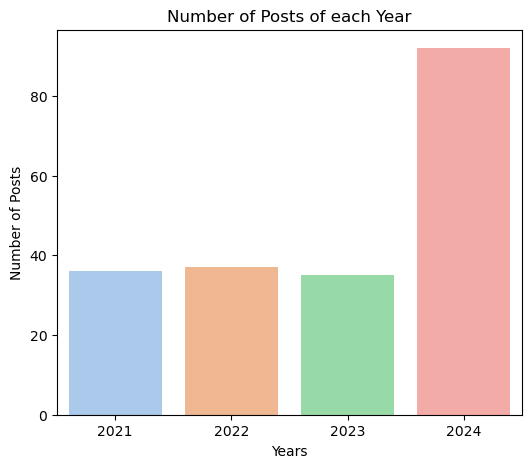

In [59]:
warnings.filterwarnings("ignore", category=FutureWarning)

plt.figure(figsize=(6,5))
sns.countplot(x='year', data=the_df, palette="pastel")
# sns.color_palette("pastel")
plt.title("Number of Posts of each Year")
plt.xlabel('Years')
plt.ylabel("Number of Posts")
plt.show()

Showing top 15 posts having highest number of comments

In [60]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

data_score = the_df.sort_values('Comment Count', ascending=False).head(15)
# Wrap long text titles for y-axis
data_score['wrapped_text'] = data_score['lemma_cleaned_text'].apply(lambda x: '\n'.join(textwrap.wrap(x, width=10)))
plt.figure(figsize=(10, 50))
plt.subplots_adjust(left=-5) 
plt.title("Posts with Highest Number of Comments", fontsize=16)
sns.barplot(y=data_score['lemma_cleaned_text'], x=data_score['Comment Count'], palette="viridis")
plt.xlabel('Score', fontsize=12)
plt.ylabel("Post's Title", fontsize=20)
plt.yticks(fontsize=10)
plt.show()


Showing top 15 posts having highest score

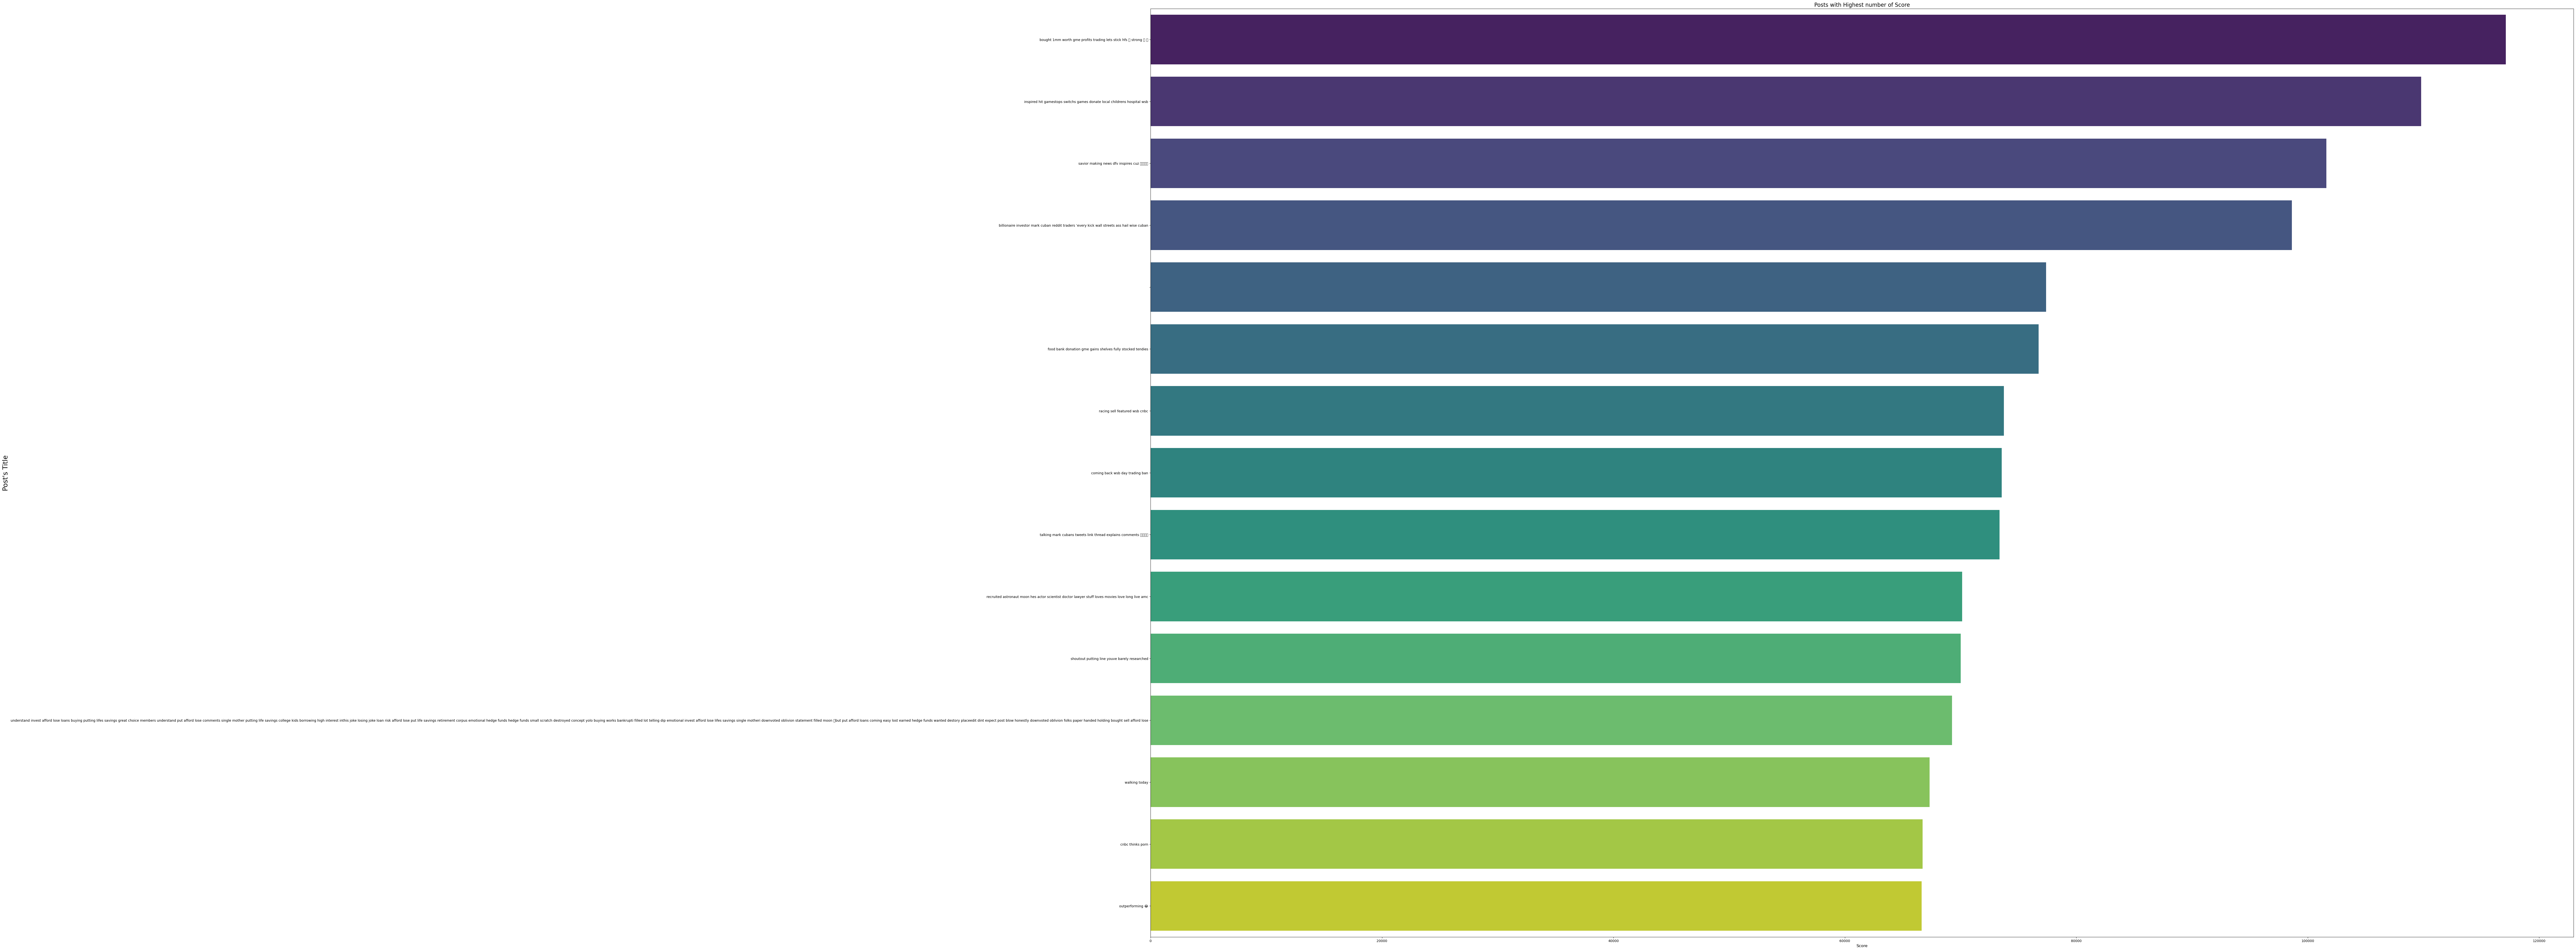

In [61]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

data_score = the_df.sort_values('Score', ascending=False).head(15)
# Wrap long text titles for y-axis
data_score['wrapped_text'] = data_score['lemma_cleaned_text'].apply(lambda x: '\n'.join(textwrap.wrap(x, width=10)))
plt.figure(figsize=(10, 50))
plt.subplots_adjust(left=-5) 
plt.title("Posts with Highest number of Score", fontsize=16)
sns.barplot(y=data_score['lemma_cleaned_text'], x=data_score['Score'], palette="viridis")
plt.xlabel('Score', fontsize=12)
plt.ylabel("Post's Title", fontsize=20)
plt.yticks(fontsize=10)
plt.show()

Let's check that more number of Comments results more score or not i.e, does these factors relates each other. For this I'll first find the correlation mactrix of columns than plot a heatmap.
**Sort the DataFrame by date**

In [62]:
the_dff = the_df.sort_values('date')

fig = px.line(the_dff, 
              x='date', 
              y='Score', 
              range_x=['2021-07-01', '2024-12-31'], 
              title='Time Series with Rangeslider',
              template='plotly_dark')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [63]:
#sentiment count
the_df['Text_sentiment_x'].value_counts()



Text_sentiment_x
Negative    82
Positive    69
Neutral     49
Name: count, dtype: int64

In [64]:
temp = the_df.groupby('Text_sentiment_x').count()['Text_x'].reset_index().sort_values(by='Text_x',ascending=False)
temp.style.background_gradient(cmap='Purples')

In [65]:
fig = go.Figure(go.Funnelarea(
    text =temp.Text_sentiment_x,
    values = temp.Text_x,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
 ))

fig.update_layout(width=800,   height=600 ,template="plotly_dark" )
fig.show()

In [66]:
THE_DF = the_df

dropping the columns and using the ones which will help in analysis

In [67]:
the_df =the_df.drop(columns=['Text_x','cleaned_text', 'cc_text' ,'year',	'month',	'day',	'hour',	'date'])

In [68]:
dt=the_df

# Sentiment Analysis

#### VEDAR Analysis
( Valence Aware Dictionary for Sentiment Reasoning) <br>
Utilizing VADER model to identify the sentiment of the tweets

In [69]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Prepare Vader sentiment analyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91829\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment Distribution
The dataset was split into 3 sentimemnt based on the compound polarity score calculated by the VADER model. The criteria was:

* if >=0, classify as positive
* if <0, classify as negative


In [70]:
# Map sentiment labels to numeric values
sentiment_mapping = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
dt['Text_sentiment_numeric'] = dt['Text_sentiment_x'].map(sentiment_mapping)

# Predict sentiment with Vader classifier
dt['Vader_Scores'] = dt['lemma_cleaned_text'].apply(lambda score: sid.polarity_scores(score)['compound'])
dt['Vader_Prediction'] = dt['Vader_Scores'].apply(lambda score: 1 if score >=0 else -1)

# Print Vader sentiment accuracy
print('Vader Accuracy:', round((len(dt[dt['Text_sentiment_numeric']==dt['Vader_Prediction']])/len(dt)) *100, 2), '%', '\n')


Vader Accuracy: 58.0 % 



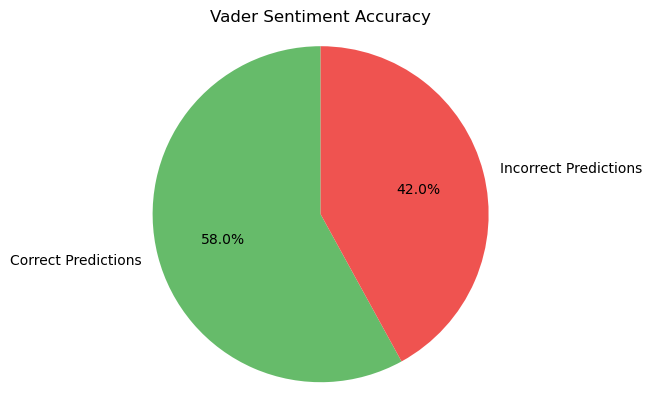

In [71]:
# Plot Vader sentiment accuracy
import matplotlib.pyplot as plt
labels = ['Correct Predictions', 'Incorrect Predictions']
sizes = [len(dt[dt['Text_sentiment_numeric'] == dt['Vader_Prediction']]), len(dt[dt['Text_sentiment_numeric'] != dt['Vader_Prediction']])]
colors = ['#66BB6A', '#EF5350']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.title('Vader Sentiment Accuracy')
plt.show()

The distribution of the tweets predicted by the model is:

* 58.0% Tweets classified as Positive
* 42.0% Tweets classified as Negative

In [72]:
# Replace 'df' with the name of your dataframe
# dt.to_csv('data.csv', index=False) 

### Key take-aways

> Adds two new columns to the DataFrame <br>
> <u>vader_score:</u>   The compound score from VADER <br>
> <u>vader_sentiment:</u>   The categorical sentiment<br>
> The conversion of sentoment to numerical is done for both original sentiments and VADER predictions.<br>
> <u>Compound Score:</u> A normalized score between -1 (most negative) and 1 (most positive). Computed by summing the valence scores of each word in the text
> <u>Valence score:</u> The measure of the emotional positivity or negativity of a word

In [73]:
# dt.head()

## Naive Bayes Modelling


we will go through different Navies Bayes Model: 
* ComplementNB
* MultinatinominalNB
* BernoulliNB <br>
and see how accuracy each model can be:

In [74]:
# rename a column
dt = dt.rename(columns={'lemma_cleaned_text': 'text'})


In [75]:
# Replace empty strings with a neutral sentiment 
dt['text'] = dt['text'].replace('', 'No sentiment available')  


### Tokenization


In [76]:
tokenized_review=dt['text'].apply(lambda x: x.split())
tokenized_review.head(5)

0    [nancy, pelosis, husband, sold, 500k, worth, v...
1    [bought, 700k, worth, today, tldr, grandma, di...
2                     [bought, 700k, worth, cheap, rn]
3             [guy, spent, 700k, inheritance, bullish]
4                                 [japanese, crashing]
Name: text, dtype: object

### Count Vectorizer

Count Vectorizer will represent words by numbers so that they can be processed by algorithms. This is done by making each unique word a column and count the number of times each word appear and then make it the row values.

In [77]:
token = RegexpTokenizer(r'[a-zA-Z0-9-_]+')
def custom_preprocessor(text):
    text = re.sub(r'_+', '_', text)  # Replace repeated underscores with a single one
    text = re.sub(r'\b[_-]+|[_-]+\b', '', text)  # Remove leading or trailing underscores/hyphens from words
    return text

# Initialize CountVectorizer with the updated tokenizer and preprocessing
cv = CountVectorizer(stop_words='english', ngram_range=(1, 1), tokenizer=token.tokenize, preprocessor=custom_preprocessor)

# Transform the text data
text_counts = cv.fit_transform(dt['text'])


# TF-IDF

TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. It measures the relative importance of words by comparing the no. of times a word appear in a sample with the number of samples with that word.

In [78]:
tfidf = TfidfVectorizer()
text_count_2 = tfidf.fit_transform(dt['text'])

In [79]:
#splitting the data in test and training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(text_count_2, dt['Vader_Prediction'],test_size=0.20,random_state=30)

<!-- Model - RandomForest -->

c:\Users\91829\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:1035: RuntimeWarning:

divide by zero encountered in log



accuracy_score_cnb = 35.00%
              precision    recall  f1-score   support

          -1       0.32      1.00      0.48        12
           1       1.00      0.07      0.13        28

    accuracy                           0.35        40
   macro avg       0.66      0.54      0.31        40
weighted avg       0.79      0.35      0.24        40

confusion matrix


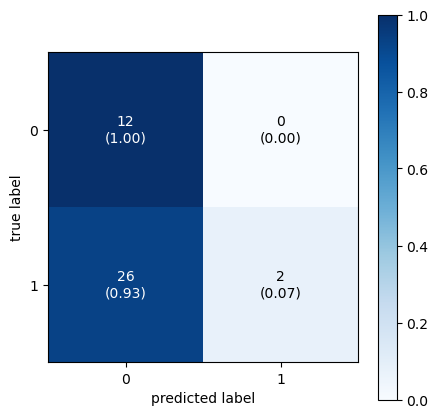

In [80]:
CNB = ComplementNB(alpha = 0.0)
CNB.fit(x_train, y_train)

predictions = CNB.predict(x_test)
accuracy_score_cnb = metrics.accuracy_score(CNB.predict(x_test), y_test)
# Calculate and print accuracy
# accuracy = accuracy_score(y_test, predictions)
#print(f'Accuracy: {round(accuracy * 100, 2)}%')

print('accuracy_score_cnb = '+str('{:4.2f}'.format(accuracy_score_cnb*100))+'%')
# print the classification report and confusion matrix
print(classification_report(y_test, predictions))
# print(confusion_matrix(y_test, predictions))
from mlxtend.plotting import plot_confusion_matrix
print("confusion matrix")

CR=confusion_matrix(y_test, predictions)
# print(CR)
# print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(5, 5),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

 


c:\Users\91829\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:890: RuntimeWarning:

divide by zero encountered in log



accuracy_score_mnb = 35.00%
              precision    recall  f1-score   support

          -1       0.32      1.00      0.48        12
           1       1.00      0.07      0.13        28

    accuracy                           0.35        40
   macro avg       0.66      0.54      0.31        40
weighted avg       0.79      0.35      0.24        40

confusion matrix


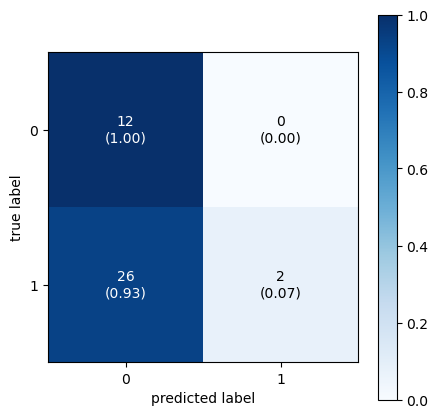

In [81]:
MNB = MultinomialNB( alpha= 0.0 , fit_prior= False)
MNB.fit(x_train, y_train)

predictions = MNB.predict(x_test)
accuracy_score_mnb = metrics.accuracy_score(MNB.predict(x_test), y_test)
# Calculate and print accuracy
# accuracy = accuracy_score(y_test, predictions)
#print(f'Accuracy: {round(accuracy * 100, 2)}%')
print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')

# Optionally, print the classification report and confusion matrix
print(classification_report(y_test, predictions))
# print(confusion_matrix(y_test, predictions))
from mlxtend.plotting import plot_confusion_matrix
print("confusion matrix")
# print('\n')
CR=confusion_matrix(y_test, predictions)
# print(CR)
# print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(5, 5),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

accuracy_score_bnb = 70.00%
              precision    recall  f1-score   support

          -1       0.50      0.33      0.40        12
           1       0.75      0.86      0.80        28

    accuracy                           0.70        40
   macro avg       0.62      0.60      0.60        40
weighted avg       0.68      0.70      0.68        40

confusion matrix


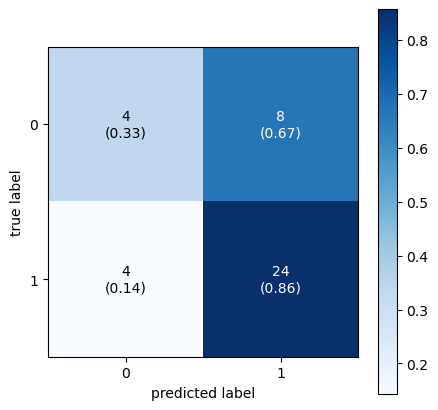

In [82]:
BNB = BernoulliNB()
BNB.fit(x_train, y_train)

predictions = BNB.predict(x_test)

accuracy_score_bnb = metrics.accuracy_score(BNB.predict(x_test), y_test)
print('accuracy_score_bnb = '+str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')


#classification report and confusion matrix
print(classification_report(y_test, predictions))
print("confusion matrix")
CR=confusion_matrix(y_test, predictions)
fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(5, 5),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()


# Text-Blob

TextBlob returns polarity and subjectivity of a sentence. 

* With TextBlob, we get polarity and subjectivity metric  -> Polarity
* It is sentiment itself ranging from -1 to +1            -> subjectivity
* It is a measure of the sentiment begin from objective to subjective from 0 to 1<br>
 The higher subjectivity means that the text contains personal opinion rather than factual information

In [83]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [84]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [85]:
dt['text'] = dt['text'].apply(lambda x: stemming(x))

In [86]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [87]:
dt['polarity'] = dt['text'].apply(polarity)

In [88]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [89]:
dt['sentiment'] = dt['polarity'].apply(sentiment)

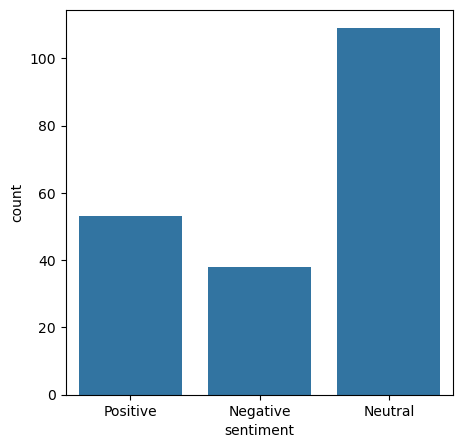

In [90]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = dt)
plt.show()

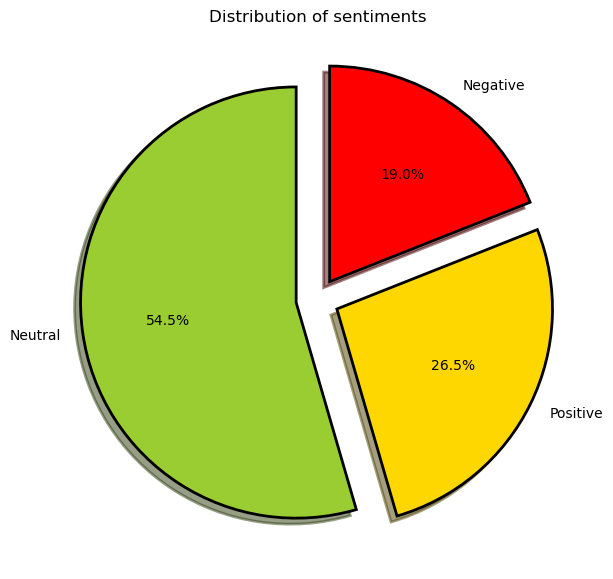

In [91]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = dt['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')
plt.show()

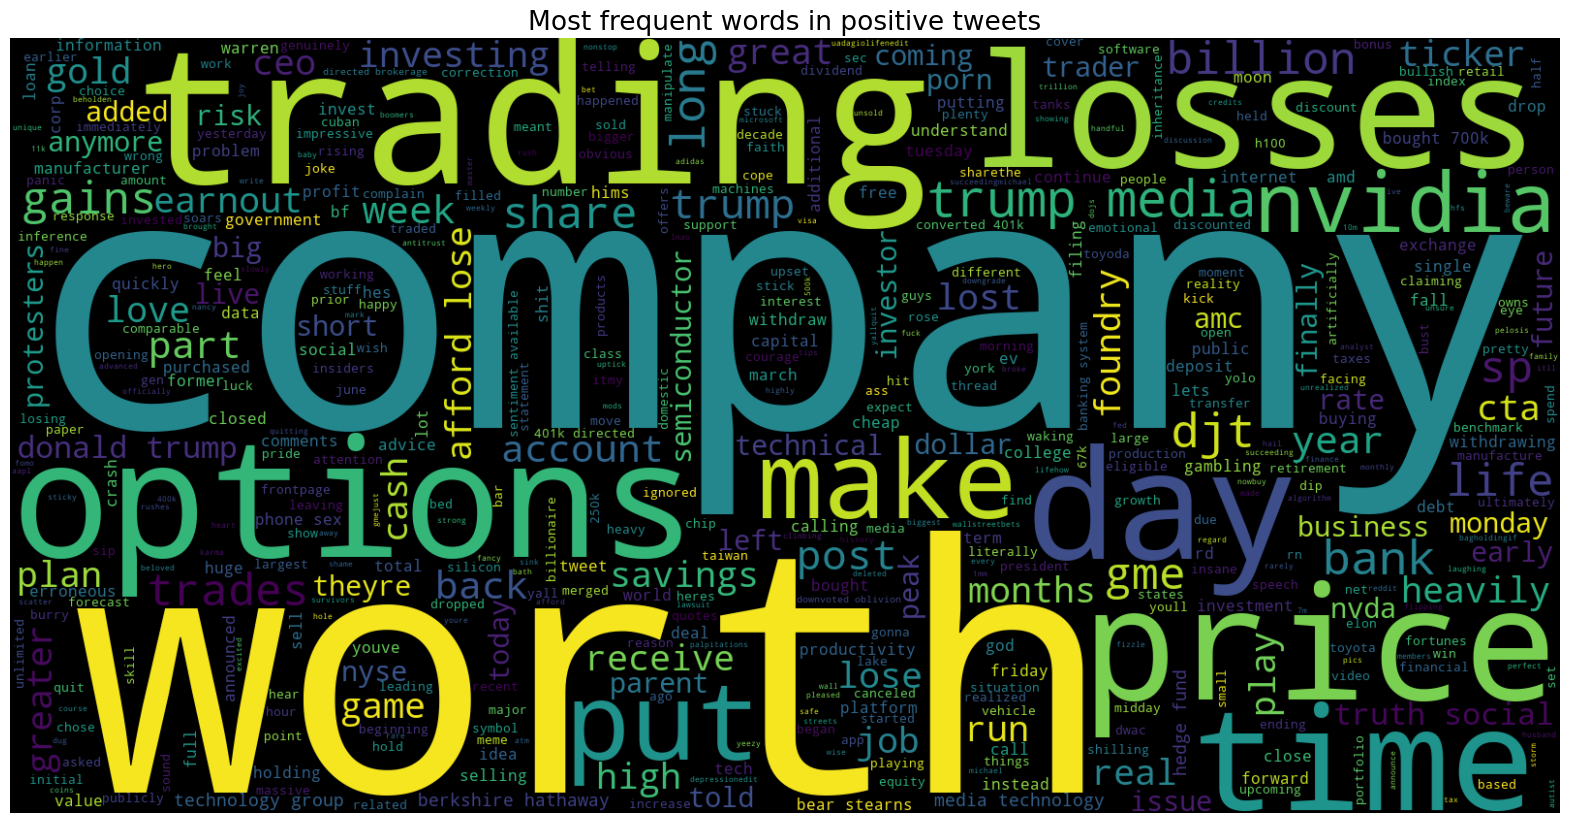

In [92]:
pos_tweets = dt[dt.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["amp"])

# Generate a word cloud image

wordcloud = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=1600, height=800).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

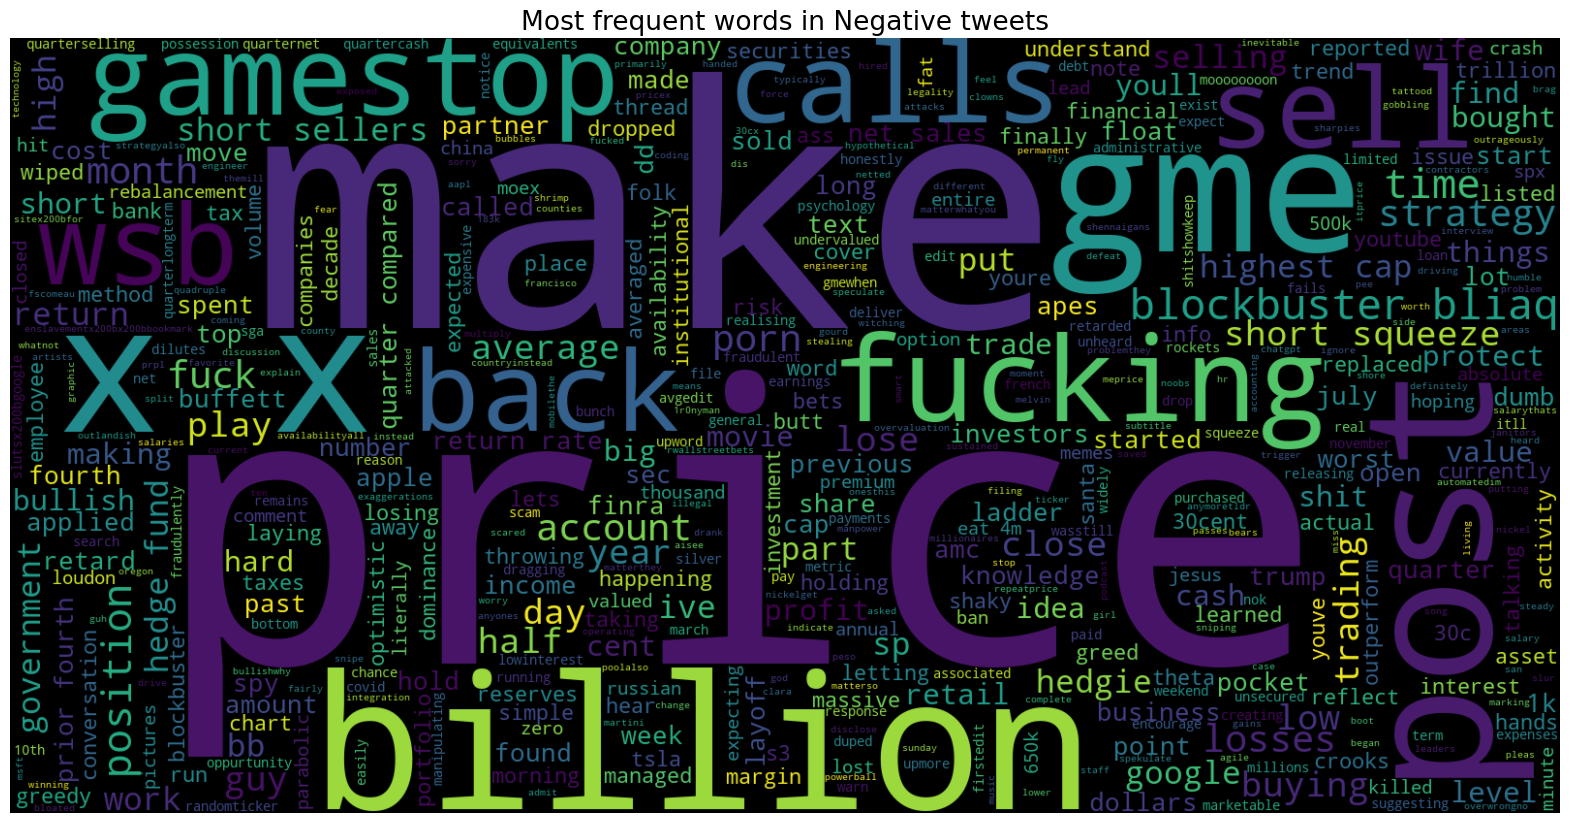

In [93]:
neg_tweets = dt[dt.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["amp"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=1600, height=800).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Negative tweets', fontsize=19)
plt.show()

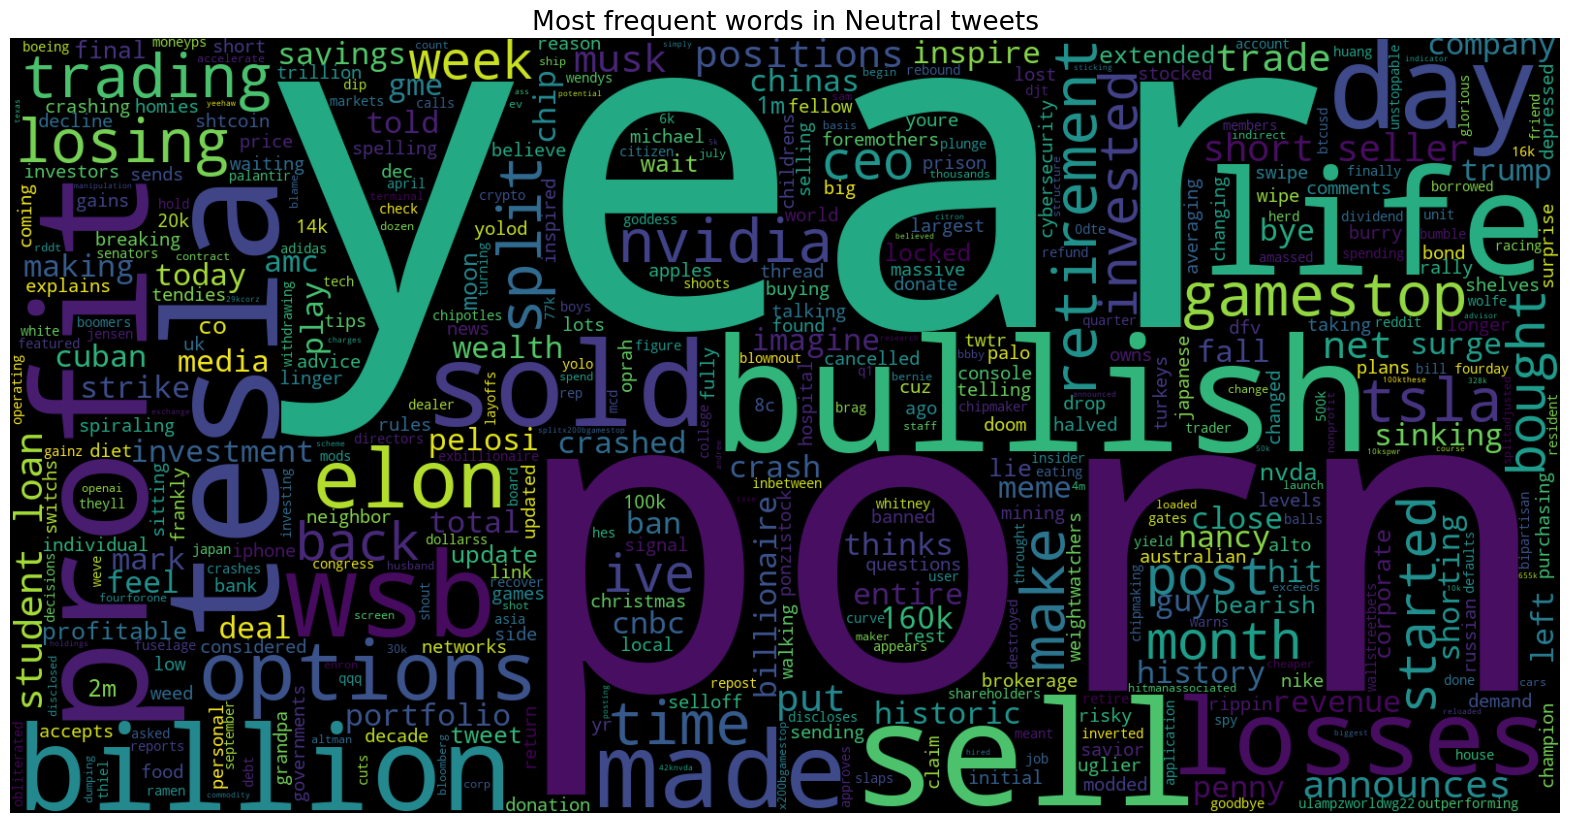

In [94]:
neutral_tweets = dt[dt.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["amp"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=1600, height=800).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Neutral tweets', fontsize=19)
plt.show()

In [95]:
# dt

### Sentimental Analysis using SentiWordNet

SentiWordNet is a valuable resource for sentiment analysis, especially in cases where understanding the sentiment conveyed by individual words is essential. <br>
SentiWordNet’s integration with WordNet adds depth to the analysis by considering word relationships and context.


In [96]:
from nltk.corpus import sentiwordnet as swn

In [97]:
swn_df = dt
swn_df

#Edits After Removing Stopwords
Edited_text = dt['text'].copy()
swn_df['text_without_stopwords'] = Edited_text

**Text Data Preprocessing and Stopword Removal Functions**<br>
Stop words are extremely common words that would be of little value in our analysis are often excluded from the vocabulary entirely.

In [98]:
def preprocess_text_data(swn_df,text):
    # Proprocessing the data
    swn_df[text]=swn_df[text].str.lower()
    # Code to remove the Hashtags from the text
    swn_df[text]=swn_df[text].apply(lambda x:re.sub(r'\B#\S+','',x))
    # Code to remove the links from the text
    swn_df[text]=swn_df[text].apply(lambda x:re.sub(r"http\S+", "", x))
    # Code to remove the Special characters from the text 
    swn_df[text]=swn_df[text].apply(lambda x:' '.join(re.findall(r'\w+', x)))
    # Code to substitute the multiple spaces with single spaces
    swn_df[text]=swn_df[text].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
    
     # Code to remove all the single characters in the text
    swn_df[text]=swn_df[text].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
    # Remove the twitter handlers
    swn_df[text]=swn_df[text].apply(lambda x:re.sub('@[^\s]+','',x))

# preprocess_text_data(swn_df,'text')

# Function to tokenize and remove the stopwords    
def rem_stopwords_tokenize(swn_df,text):
      
    def getting(sen):
        example_sent = sen
        
        filtered_sentence = [] 

        stop_words = set(stopwords.words('english')) 

        word_tokens = word_tokenize(example_sent) 
        
        filtered_sentence = [w for w in word_tokens if not w in stop_words]
        return filtered_sentence
    # Using "getting(sen)" function to append edited sentence to data
    x=[]
    for i in swn_df[text].values:
        x.append(getting(i))
    swn_df[text]=x

**Text Lemmatization and Cleaning Function**<br>
Lemmatization is the process of converting words from a sentence into a dictionary.

In [99]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def Lemmatization(swn_df,text):
    def getting2(sen):
        
        example = sen
        output_sentence =[]
        word_tokens2 = word_tokenize(example)
        lemmatized_output = [lemmatizer.lemmatize(w) for w in word_tokens2]
        
        # Remove characters which have length less than 2  
        without_single_chr = [word for word in lemmatized_output if len(word) > 2]
        # Remove numbers
        cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]
        return cleaned_data_title
    # Using "getting2(sen)" function to append edited sentence to data
    x=[]
    for i in swn_df[text].values:
        x.append(getting2(i))
    swn_df[text]=x

Reconstructing Sentences from Tokenized Text Data

In [100]:
def make_sentences(swn_df,text):
    swn_df[text]=swn_df[text].apply(lambda x:' '.join([i+' ' for i in x]))
    # Removing double spaces if created
    swn_df[text]=swn_df[text].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

Text Data Preprocessing: Removing Stopwords, Tokenization, and Lemmatization

In [101]:
import nltk
nltk.download('punkt')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
preprocess_text_data(swn_df,'text_without_stopwords')
rem_stopwords_tokenize(swn_df,'text_without_stopwords')
# Converting all the texts back to sentences
make_sentences(swn_df,'text_without_stopwords')
final_Edit = swn_df['text_without_stopwords'].copy()
swn_df["After_lemmatization"] = final_Edit

# Using the Lemmatization function to lemmatize the data
Lemmatization(swn_df,'After_lemmatization')
# Converting all the texts back to sentences
make_sentences(swn_df,'After_lemmatization')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91829\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Performing Sentiment Analysis with Sentiment WordNet (SentiWordNet)

In [102]:
from nltk.corpus import wordnet as wn
nltk.download('averaged_perceptron_tagger')
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

pos=neg=obj=count=0

postagging = []

for text in swn_df['After_lemmatization']:
    list = word_tokenize(text)
    postagging.append(nltk.pos_tag(list))

swn_df['pos_tags'] = postagging

def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None
# Returns list of pos-neg and objective score.
def get_sentiment(word,tag):
    wn_tag = penn_to_wn(tag)
    
    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        return []

    #Lemmatization
    lemma = lemmatizer.lemmatize(word, pos=wn_tag)
    if not lemma:
        return []
    
    #Synset is a special kind of a simple interface that is present in NLTK to look up words in WordNet. 
    #Synset instances are the groupings of synonymous words that express the same concept. 
    #Some of the words have only one Synset and some have several.

    synsets = wn.synsets(word, pos=wn_tag)
    if not synsets:
        return []

    # Take the first sense, the most common
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())

    return [synset.name(), swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]

    pos=neg=obj=count=0
    
senti_score = []

for pos_val in swn_df['pos_tags']:
    senti_val = [get_sentiment(x,y) for (x,y) in pos_val]
    for score in senti_val:
        try:
            pos = pos + score[1]  #positive score is stored at 2nd position
            neg = neg + score[2]  #negative score is stored at 3rd position
        except:
            continue
    senti_score.append(pos - neg)
    pos=neg=0    
    
swn_df['senti_score'] = senti_score
print(swn_df['senti_score'])


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91829\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\91829\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


0      0.000
1      0.625
2      0.000
3      0.000
4      0.000
       ...  
195   -0.125
196    0.000
197    0.000
198   -0.125
199    0.875
Name: senti_score, Length: 200, dtype: float64


Assigning Sentiment Labels Based on Sentiment Scores

In [103]:
swn_df['SENTIMENT']=''
swn_df.loc[swn_df.senti_score >= 0.05,'SENTIMENT']='POSITIVE'
swn_df.loc[swn_df.senti_score <= -0.05,'SENTIMENT']='NEGATIVE'
swn_df.loc[swn_df.senti_score == 0,'SENTIMENT']='NEUTRAL'
# swn_df.head()

Visualizing Sentiment Distribution in the Dataset

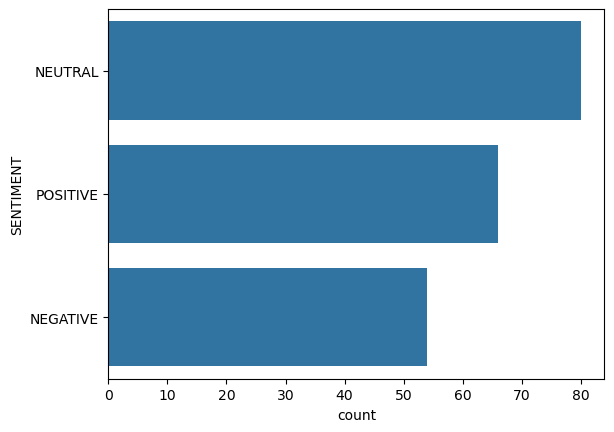

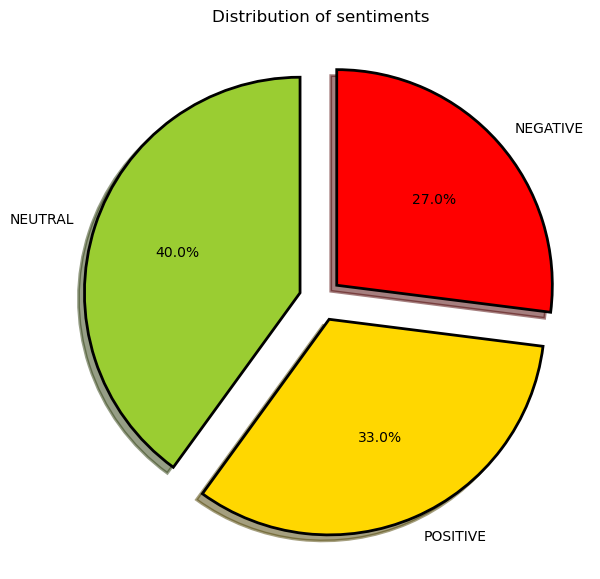

In [104]:
import seaborn as sns
sns.countplot(swn_df['SENTIMENT'])
plt.show()

#Pie chart
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = swn_df['SENTIMENT'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')
plt.show()

# Flair

In [105]:
empty_strings_count = (dt['text'].str.strip() == '').sum()
print(f"Number of empty strings in 'text': {empty_strings_count}")


Number of empty strings in 'text': 0


In [106]:
# Replace empty strings with a neutral sentiment 
dt['text'] = dt['text'].replace('', 'No sentiment available')  


In [ ]:
from flair.nn import Classifier
from flair.splitter import SegtokSentenceSplitter
import pandas as pd

# Initialize sentence splitter
splitter = SegtokSentenceSplitter()

# Load the NER model
tagger = Classifier.load('ner')

# Lists to hold predictions and true labels
predicted_labels = []
true_labels = []

# Iterate through each row in the DataFrame
for index, row in dt.iterrows():
    # Split the text into sentences
    sentences = splitter.split(row['text'])
    
    # Predict tags for sentences
    tagger.predict(sentences)
    
    # Process each sentence to determine predicted labels
    for sentence in sentences:
        entities = sentence.get_spans('ner')  # Get the predicted entities
        
        # Check for specific keywords to determine the predicted label
        if any(keyword in sentence.to_plain_string() for keyword in ['Purchased', 'buy', 'good', 'bought',"stock",'profitable','Intel','bought','invested','700k','Billionaire','GME','gains','LOT','sold','Investor','today','Feels','worth','company','trades','bank','price','share','gold','options','media','business','trading','nvidia']):
            predicted_labels.append(1)  # Positive sentiment
        else:
            predicted_labels.append(0)  # Negative or neutral sentiment
    
    # Append the true sentiment label for this row
    true_labels.append(row['Text_sentiment_numeric'])

# Calculate accuracy
correct_predictions = sum(p == t for p, t in zip(predicted_labels, true_labels))
accuracy = correct_predictions / len(true_labels) * 100

# Add predicted labels to the DataFrame
dt['predicted_labels'] = predicted_labels

# Print the DataFrame with sentences, predicted, and true labels
print(dt[['text', 'predicted_labels', 'Text_sentiment_numeric']])

# Print the accuracy
print(f"\nAccuracy of Flair NER: {accuracy:.2f}%")


2024-10-13 22:29:31,778 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, S-ORG, S-MISC, B-PER, E-PER, S-LOC, B-ORG, E-ORG, I-PER, S-PER, B-MISC, I-MISC, E-MISC, I-ORG, B-LOC, E-LOC, I-LOC, <START>, <STOP>


# 🎬 Final Words
In this project, I dove deep into understanding people's feelings from text and **Sentimental analysis** plays a significant role in determining the polarity of a review or a comment. It is used to know whether the person is talking about something in a positive way or a negative way. <br> I cleaned up messy data, prepared it for analysis, and used smart computer tools like VADER, Flair, TextBlob, and Naive Bayes to figure out if words were happy, sad, or neutral. By comparing these different methods, I got a well-rounded view of the sentiments. This work helps us better understand what people think and feel, which can be super useful in many areas, from improving customer service to guiding business decisions.